# NBA Wins Predictions

## Imports

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import theano.tensor as tt
#import pymc3 as pm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

np.random.seed(102) # picking a random seed for model simulations
pd.options.mode.chained_assignment = None 

## Do Advanced Metrics Have Predictive Value for Team Wins?

We will be using a Random Forest to see if a mix of advanced statistics can determine win count and whether or not a team made the playoffs, and a Bayesian model to see if making parametric assumptions about these statistics will make win predictions more difficult.

### Loading and Cleaning Data

In [117]:
team = pd.read_csv('./data/2023_teams.csv')
team

,RANK,TEAM,CONF,DIVISION,GP,PPG,oPPG,pDIFF,PACE,oEFF,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,NaN,Milwaukee,East,Central,82,116.9,113.3,3.6,100.5,115.5,...,3.16,15.0,0.086,58,24,0.707,0.595,0.619,0.112,-2
1,NaN,Boston,East,Atlantic,82,117.9,111.4,6.5,98.4,118.1,...,5.76,14.3,0.063,57,25,0.695,0.677,0.714,0.018,3
2,NaN,Philadelphia,East,Atlantic,82,115.2,110.9,4.3,96.8,117.8,...,4.51,13.3,0.021,54,28,0.659,0.629,0.642,0.030,2
3,NaN,Cleveland,East,Central,82,112.3,106.9,5.4,95.6,116.2,...,4.57,12.9,0.004,51,31,0.622,0.667,0.678,-0.045,-1
4,NaN,New York,East,Atlantic,82,116.0,113.1,2.9,97.1,117.8,...,2.88,13.0,0.021,47,35,0.573,0.589,0.595,-0.016,-2
5,NaN,Brooklyn,East,Atlantic,82,113.4,112.5,0.9,98.3,115.0,...,0.75,15.6,0.036,45,37,0.549,0.521,0.530,0.028,-1
6,NaN,Miami,East,Southeast,82,109.5,109.8,-0.3,96.1,113.2,...,-0.37,11.8,-0.070,44,38,0.537,0.490,0.490,0.047,1
7,NaN,Atlanta,East,Southeast,82,118.4,118.1,0.3,100.7,116.7,...,0.92,12.9,-0.026,41,41,0.500,0.509,0.510,-0.009,-2
8,NaN,Toronto,East,Atlantic,82,112.9,111.4,1.5,97.1,115.5,...,1.18,12.5,-0.119,41,41,0.500,0.548,0.549,-0.048,1
9,NaN,Chicago,East,Central,82,113.1,111.8,1.3,98.5,113.5,...,1.41,15.0,-0.013,40,42,0.488,0.534,0.543,-0.046,2


Legend: <br><br>
RANK: Determined by Win-Loss Record (1 = most wins, 30 = least wins) <br><br>
TEAM: City the team plays in <br><br>
CONFERENCE: Conference the team plays in (either East or West) <br><br>
DIVISION: Division team plays in <br><br>
GP: Games played <br><br>
PPG: Points Scored Per Game <br><br>
oPPG: Points Allowed Per Game <br><br>
pDIFF: Points Differential = [(Total Points Scored) – (Total Points Allowed)]/ (Games Played) <br><br>
PACE: Pace, an estimate of Possessions Per 48 Minutes <br><br>
oEFF: Offensive Efficiency, points scored per 100 possessions <br><br>
dEFF: Defensive Efficiency, points allowed per 100 possessions <br><br>
eDIFF: Efficiency Differential = [(Total Offensive Efficiency) – (Total Defensive Efficiency)]/ (Games Played) <br><br>
SOS: Strength of the Schedule, Opponent efficiency differential average for all games played so far (venue of the games also taken into account) is used as an indicator of the strength of the schedule. The higher the SoS rating, the tougher the schedule; where zero is average <br><br>
rSOS: Remaining Strength of the Schedule, Opponent efficiency differential average for the remaining games (venue of the games also taken into account) is used as an indicator of the strength of the schedule. The higher the rSOS rating, the tougher the remaining schedule; where zero is average <br><br>
SAR: Schedule Adjusted Rating, an evaluation of teams based on efficiency differential and strength of schedule <br><br>
CONS: Consistency Rating, consistency based on game-by-game efficiency differential variation. The higher the team has consistency rating, the more unpredictable it is <br><br>
a4F: Adjusted Four Factors, calculated by applying weights to the differentials of offensive and defensive four factors. A4F explains the specified proportion of variability in wins <br><br>
W: Wins: Total number of games won <br><br>
L: Losses: Total number of games lost <br><br>
W%: Winning percentage <br><br>
eWIN%: Correlated Gaussian Expected Winning Percentage, indicates the ideal winning percentage based on offensive and defensive performance <br><br>
pWIN%: Projected Winning Percentage, each point differential translates to 2.7 wins over the course of the season <br><br>
ACH: Achievement Level In Terms of Wins, this metric is based on the differential between actual and expected winning percentages. Positive figures indicate overachievement while negative figures indicate the team should have won more games. <br><br>
STRK: Current Streak, winning or losing streak for the season <br><br>

For our outcome variable, winning, we will use wins (W) as they are a whole number and guaranteed to be between 0-82. Given that W + L = 82, we can drop our L (loss) column. For this same reason, we will drop Games Played (GP) as all teams played 82 games, and will drop STRK bc it only shows the current streak, not all streaks for the entire season and therefore likely lacks much predictive value. RANK is also based on Wins, so this will be dropped.

As for other columns to drop, we will remove Conference, Division, and Team, as they are categorical variables that are not advanced statistics, so they serve no purpose in our analysis. 

We will even remove some advanced statistics as well. The rSOS (remaining Strength of Schedule) metric is based on the assumption there are games left in the season, but since the season is completed, we can use the normal SOS metric. We will drop PPG, oPPG in favor of pDiff, as pDiff is the difference of the former two statistics. The same logic will apply to dropping oEFF and dEFF in favor of eDIFF. pDIFF and eDIFF are also very similar statistics, so we will keep eDIFF as an admittedly arbitrary choice. a4F is a linear combination of offensive/defensive metrics, which we have already accounted for, so we will drop this column. SAR is a combination of eDIFF and SOS, which we are already using. Finally, eWIN%, pWIN%, and ACH are not really advanced statistics that have much interested as they are based on statistics we are already using. 

This leaves us with a final set of features of: Pace, eDIFF, SOS, and CONS. 

In [122]:
final_features = ['PACE', 'eDIFF', 'SOS', 'CONS']

In [124]:
features = team[['PACE', 'eDIFF', 'SOS', 'CONS']]
outcome = team['W']

### Random Forests

#### Training the Random Forest

I chose to use Random Forests for this problem because it is a powerful and versatile method that can capture complex relationships between features and target variables. Random Forests are an ensemble learning method that constructs multiple decision trees and combines their predictions to improve the overall accuracy and control overfitting.

Random Forests already implement bagging by constructing multiple decision trees, but in order to prevent even more overfitting, we will put a maximum depth on our trees. The default depth for regression is considered to be 1/3 of the number of features, so we will implement this accordingly. Also, we will use the convention of sqrt(number of features) for the maximum number of features to use at each split of the tree, again another popular convention. 

For a train-test split, I will use the convention of an 70-30 split. 

In [129]:
# Preparation

X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.3, random_state=42)

# Training
rf_model = RandomForestRegressor(max_depth = int(len(features.columns)/3), max_features = int(np.sqrt(len(features.columns))), random_state=42)
rf_model.fit(X_train, y_train)

# Training Predictions
y_train_pred = rf_model.predict(X_train)

# Training Evaluation
train_rmse = mean_squared_error(y_train, y_train_pred)**0.5
train_r2 = r2_score(y_train, y_train_pred)

print("Train Root Mean Squared Error:", round(train_rmse, 2))
print("Train R\u00B2:", round(train_r2, 2))

Train Root Mean Squared Error: 5.55
Train R²: 0.71


This RMSE is not bad, and our $R^2$ is decent as well. Let's see if we can replicate this performance on our test data:

#### Test Performance

In [133]:
y_test_pred = rf_model.predict(X_test)

test_rmse = mean_squared_error(y_test, y_test_pred)**0.5
test_r2 = r2_score(y_test, y_test_pred)

print("Test Root Mean Squared Error:", round(test_rmse, 2))
print("Test R\u00B2:", round(test_r2, 2))

Test Root Mean Squared Error: 4.88
Test R²: 0.67


Interestingly, our RMSE is lower, but our $R^2$ is also lower. This is a relatively small change, so this could very well be variation within the test vs. training dataset. This gives us some confidence that our model does not have an overfitting problem, and could generalize well to different data. 

We made a decent predictor using a nonparametric ensemble model, meaning we made no assumptions about the distribution of our data, and used a mutlitude of models (in this case, decision trees), to ensure we were not overly susceptible to chance variation.

Can we create a stronger model if we make assumptions about our data?

### Bayesian Modeling

#### The General Linear Model

I will use a Bayesian linear regression model as our Bayesian Generalized Linear Model (GLM). It is a very interpretable method for predicting the success of NBA teams based on the selected features. Linear regression models assume a linear relationship between the predictors and the target variable, which can help us understand the individual contributions of each feature to the winning percentage of the teams.

What is the difference between using a GLM vs. standard linear regression? In a GLM, we treat our predictors as random variables, not as constants. So, random variables have distributions. We use a prior distribution that takes into account what we know about the given predictors, and as our data is processed, we use Bayes' rule to update the distributions in the form of a posterior distribution. If we knew a lot about our data, we would want to use a strong prior distribution (i.e., one with lower variance) and therefore not let the data influence the posterior distribution as much. However, since we are starting off without much information, we will use a weak prior of a normal distribution with mean 0 and variance 100, letting our data greatly influence the posterior distributions.

We also have a link and likelihood function. The link function tells us how our linear predictor maps to the expected value of the predictor variables. Since we don't know much about our data, and are using a linear regression, we will assume our data takes on a Normal Distribution. Therefore, we use the identity link function, which assumes our outcome variable can be a linear combination of our predictor variables. The likelihood function tells us the probability of having seen the given data, under assumptions about our parameters. Since we assume our parameters are normally distributed, we use a Gaussian likelihood. 

The Bayesian linear regression model assumes the following form:

`W = β0 + β1 * pDIFF + β2 * PACE + β3 * eDIFF + β4 * SOS + β5 * CONS + ε`

where βi represents the coefficients for each feature, and ε is the error term.

As mentioned, the Bayesian GLM linear regression makes parametric assumptions about our data. They are:

1. Linearity: The relationship between the predictors and the target variable is assumed to be linear.

2. Independence: The observations are assumed to be independent of each other.

3. Homoscedasticity: The model assumes that the variance of the error term is constant across all levels of the predictors.

We will build our model without evaluating these assumptions for the sake of seeing our model performance. We will be evaluating our assumptions later when discussing the interpretation of the results. 

#### Model Specifications

In [68]:
# Standardize features and outcome to have mean = 0, sd = 1
standardized_features = (features - features.mean())/features.std()
standardized_outcome = (outcome - outcome.mean())/outcome.std()

X_train, X_test, y_train, y_test = train_test_split(standardized_features, standardized_outcome, test_size=0.3, random_state=42)

In [ ]:
# Model specification
with pm.Model() as bayesian_model:
    # Priors
    beta_0 = pm.Normal('beta_0', mu=0, sd=100)
    betas = pm.Normal('betas', mu=0, sd=100, shape=X_train.shape[1])

    # Linear regression model
    mu = beta_0 + tt.dot(X_train, betas)

    # Likelihood
    sigma = pm.HalfNormal('sigma', sd=100)
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y_train)

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, cores=2)

# summary
pm.summary(trace).round(2)

/tmp/ipykernel_243/482350756.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=1000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, betas, beta_0]


#### Training Performance

In [ ]:
# Model evaluation
with bayesian_model:
    # Posterior predictive checks (PPC) on test data
    ppc = pm.sample_posterior_predictive(trace, var_names=['beta_0', 'betas', 'sigma'], samples=500)
    y_train_pred = ppc['beta_0'].mean(axis=0) + np.dot(X_train, ppc['betas'].mean(axis=0))

    # Peformance metrics 
    rmse = mean_squared_error(y_train, y_train_pred)
    print(f'Train Root Mean Squared Error: {rmse:.2f}')

    r2 = r2_score(y_train, y_train_pred)
    print(f'Train R\u00B2: {r2:.2f}')

#### Test Performance

In [ ]:
# Model evaluation
with bayesian_model:
    # Posterior predictive checks (PPC) on test data
    ppc = pm.sample_posterior_predictive(trace, var_names=['beta_0', 'betas', 'sigma'], samples=500)
    y_test_pred = ppc['beta_0'].mean(axis=0) + np.dot(X_test, ppc['betas'].mean(axis=0))

    # Peformance metrics 
    rmse = mean_squared_error(y_test, y_test_pred)
    print(f'Test Root Mean Squared Error: {rmse:.2f}')

    r2 = r2_score(y_test, y_test_pred)
    print(f'Test R\u00B2: {r2:.2f}')

Based on the mean squared error (MSE) of 0.07 and the R-squared score of 0.92, the Bayesian GLM appears to perform well on the test data. The low MSE suggests that the model's predictions are close to the true values, and the high R-squared score indicates that the model explains a large proportion of the variance in the dependent variable. 

Since the model only considers a limited set of features, some that could have a significant impact on team success are excluded, such as team chemistry, coaching, and injuries. Additionally, the model assumes a linear relationship between the features and the target, which may not always be the case. Finally, the model was trained on a single season of data, so its ability to generalize to other seasons is uncertain.

The uncertainty in the results is relatively low, which is indicated by the narrow credible intervals (hdi_3% to hdi_97%) for the parameters and the relatively small standard deviations for most of the variables. However, there is a high uncertainty in the estimates for betas[3], betas[4], and betas[5], as indicated by their wide credible intervals and high standard deviations. This high uncertainty may be due to the relatively small dataset size, the noise in the data, or the complexity of the model.

#### Assumption Evaluation

As mentioned in previous sections, our model makes assumptions about our data. We will evaluate our assumptions below and discuss how they affect the interpretability of our model.

##### Assumption 1: Linearity between Features and Outcome Variable

To examine the linearity of our features and outcome variables, we will plot the correlation matrix between our variables and also plot the scatterplots (the latter is for seeing if any variable transformations could create more linear relationships): 

In [96]:
features_and_outcomes = features.copy()
features_and_outcomes['W'] = outcome
features_and_outcomes.corr()

,PACE,eDIFF,SOS,CONS,W
PACE,1.000000,-0.312374,0.363610,0.013174,-0.241041
eDIFF,-0.312374,1.000000,-0.747715,0.228554,0.955967
SOS,0.363610,-0.747715,1.000000,-0.185789,-0.732098
CONS,0.013174,0.228554,-0.185789,1.000000,0.281090
W,-0.241041,0.955967,-0.732098,0.281090,1.000000


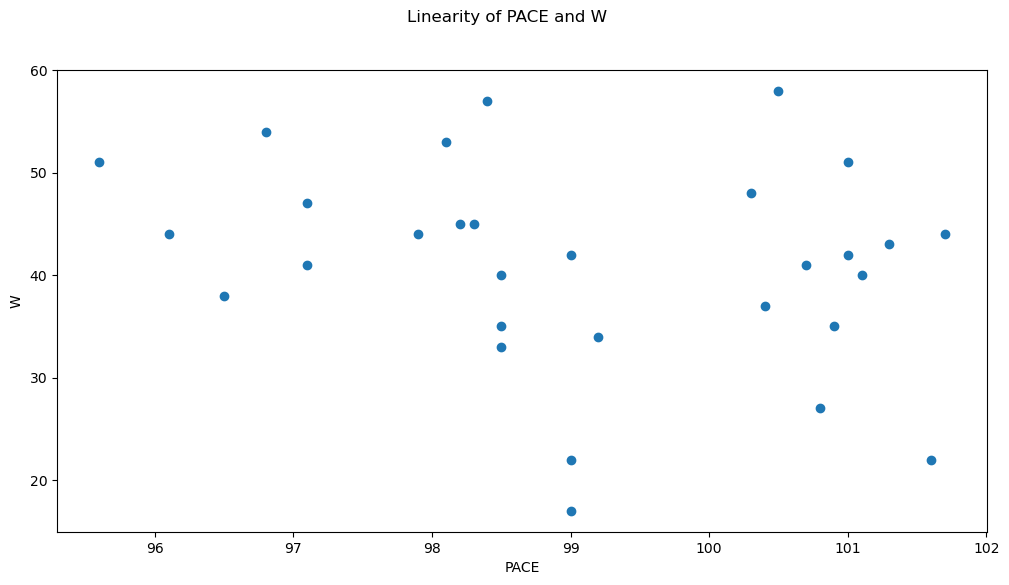

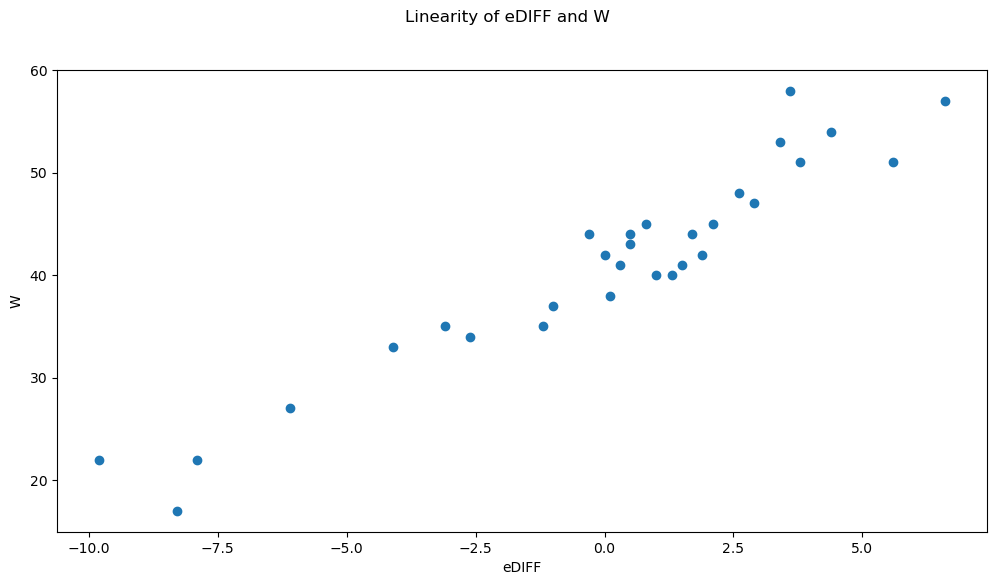

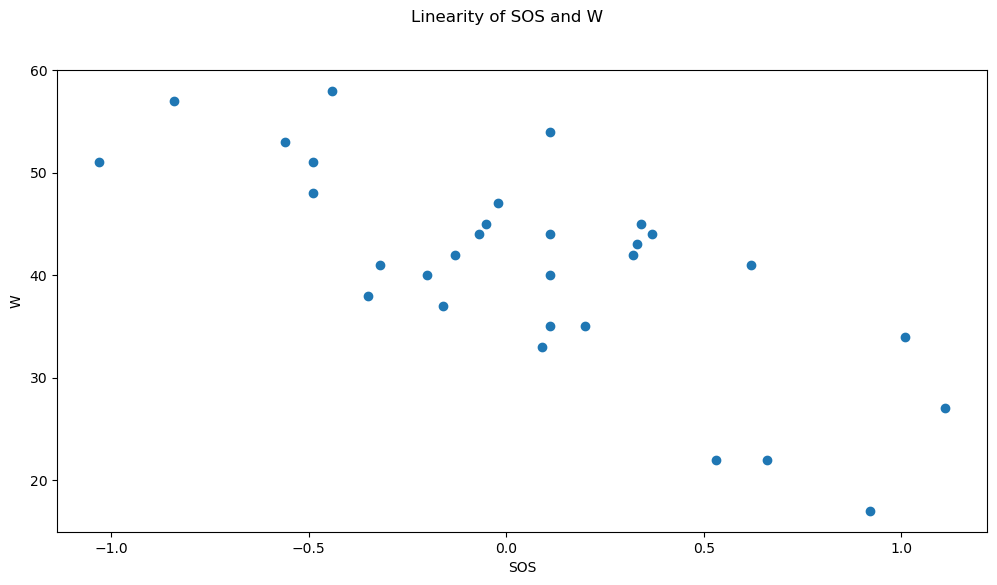

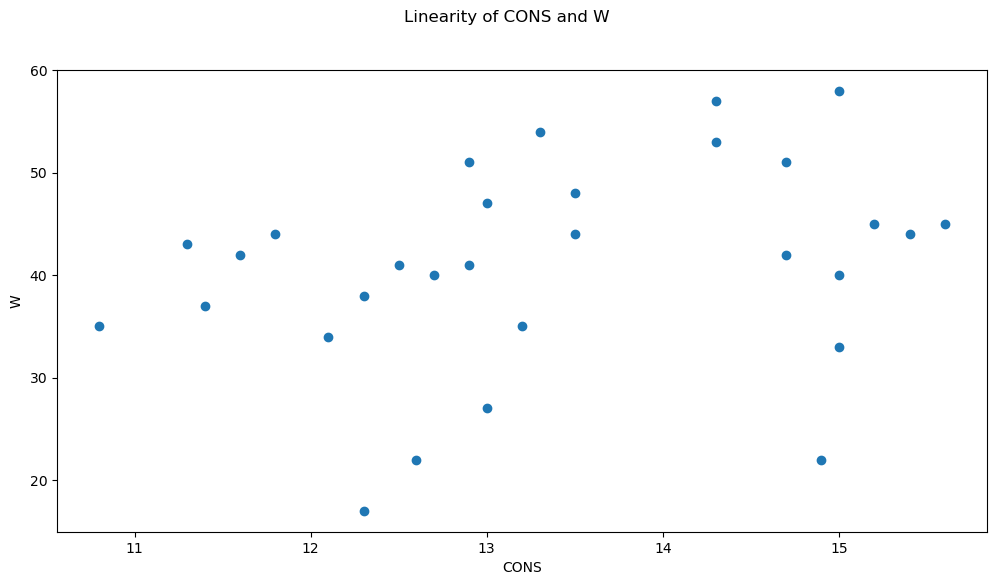

In [158]:
for feature in final_features:
    fig, sbp = plt.subplots(ncols=1, figsize=(12, 6))
    ax = sbp
    ax.set_xlabel(feature)
    ax.set_ylabel('W')
    fig.suptitle(f'Linearity of {feature} and W')
    s = ax.scatter(team[feature], outcome)

The linear relationships for SOS and eDIFF are rather strong, while those for PACE and CONS are rather weak. There don't appear to be any linear transformations based on the Tukey-Mosteller diagram that would be appropriate for our data. Our assumption of linearity seems passable, but we should proceed with caution with interpreting our results. 

##### Assumption 2: Indpendence of Observations

We would plot a pairwise plot to determine if there is any level of dependence, but inuitively we already know this to be true, as the results of one team will by definition impact another, since the teams play each other! So, with this assumption violated to some extent, our results carry less validity.

##### Assumption 3: Homoscedasticity of Errors

We plot the predictions vs. the residuals of our plot to examine this (have to fix the file issue first so can generate results...):

## Model Comparison, Limitations on Generalizability

Based on the results, decision-makers in the NBA can use the models to inform their decisions related to team composition and strategy, but they should also consider the limitations and uncertainties associated with the models. The Bayesian model provides uncertainty estimates, which can be useful for decision-making, while the frequentist model has slightly better performance metrics. The Random Forest model performed the best in predicting team success, but the perfect fit may indicate overfitting or data leakage, and further investigation is needed to increase confidence in its applicability to future datasets.

A limitation of the models is that they only consider a limited set of features and do not capture factors such as team chemistry, coaching, and injuries. Future work could incorporate additional features and explore different modeling techniques to improve the models' performance and generalizability.

The results also show that the models' predictions are consistent with the actual teams that made it to the playoffs, suggesting their real-world applicability. However, decision-makers should still exercise caution when using the models to inform their decisions and consider additional factors that may impact team success.

In summary, the models provide a useful tool for predicting team success based on selected features, but decision-makers should consider their limitations and uncertainties. Future work could explore additional features and modeling techniques to improve performance and generalizability.

A call to action based on the results is to encourage decision-makers in the NBA to use these models as one of many tools to inform their decisions related to team composition and strategy. The models provide valuable insights into the relationships between features and team success and can help decision-makers make more informed decisions. However, decision-makers should also consider other factors that may impact team success, such as team chemistry, coaching, and injuries, and exercise caution when using the models to inform their decisions.